In [566]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import numpy as np
from salishsea_tools.nc_tools import scDataset
import scipy.io as sio
import numpy.ma as ma
import math
import matplotlib.gridspec as gridspec

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_plot

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

(cmapmc, norm) = functions_plot.Colormap()
from matplotlib.colors import ListedColormap
cmapmc_r = ListedColormap(cmapmc.colors[::-1])

In [406]:
def plot_map(fig, ax, x, y, z, cmapmc):
    if cmapmc == None:
        pass
    else:
        p = ax.pcolorfast(x, y, z, cmap=cmapmc, vmin=-1600, vmax=1000)
    CS = ax.contour(x, y, z, levels = np.arange(-500, 0, 20), colors='k', linestyle='-', alpha=0.5)
    for line in CS.collections:
        if line.get_linestyle() == [(None, None)]:
            print("Solid Line")
        else:
            line.set_linestyle([(None, None)])
            line.set_color('k')
    ax.clabel(CS, fmt='%1.1f')
    n=4
    ax.legend(loc=2, fontsize=20)
    ax.set_xlim([-141, -136])
    ax.set_ylim([69.5, 70.5])
    w=1/math.cos(math.radians(70.0))
    ax.set_aspect(w)
    ax.set_ylabel('latitude [$^o$]', fontsize=20)
    ax.set_xlabel('longitude [$^o$]', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    fig.tight_layout()
    return fig, ax

In [3]:
data = sio.loadmat('./MackenzieTransects.mat')

struct_north = data['stn']
struct_south = data['sts']

dtype_north = struct_north.dtype
dtype_south = struct_south.dtype

data_north = {n: struct_north[n][0, 0] for n in dtype_north.names}
data_south = {n: struct_south[n][0, 0] for n in dtype_south.names}

In [184]:
dist_s = data_south['dist'][0,:]
lat_s = data_south['latx'][0,:]
lon_s = data_south['lonx'][0,:]
temp_s = ma.masked_invalid(data_south['temp'])
salt_s = ma.masked_invalid(data_south['sal'])
dep_s = data_south['z'][:,0]

In [185]:
dist_n = data_north['dist'][0,:]
lat_n = data_north['latx'][0,:]
lon_n = data_north['lonx'][0,:]
temp_n = ma.masked_invalid(data_north['temp'])
salt_n = ma.masked_invalid(data_north['sal'])
dep_n = data_north['z'][:,0]

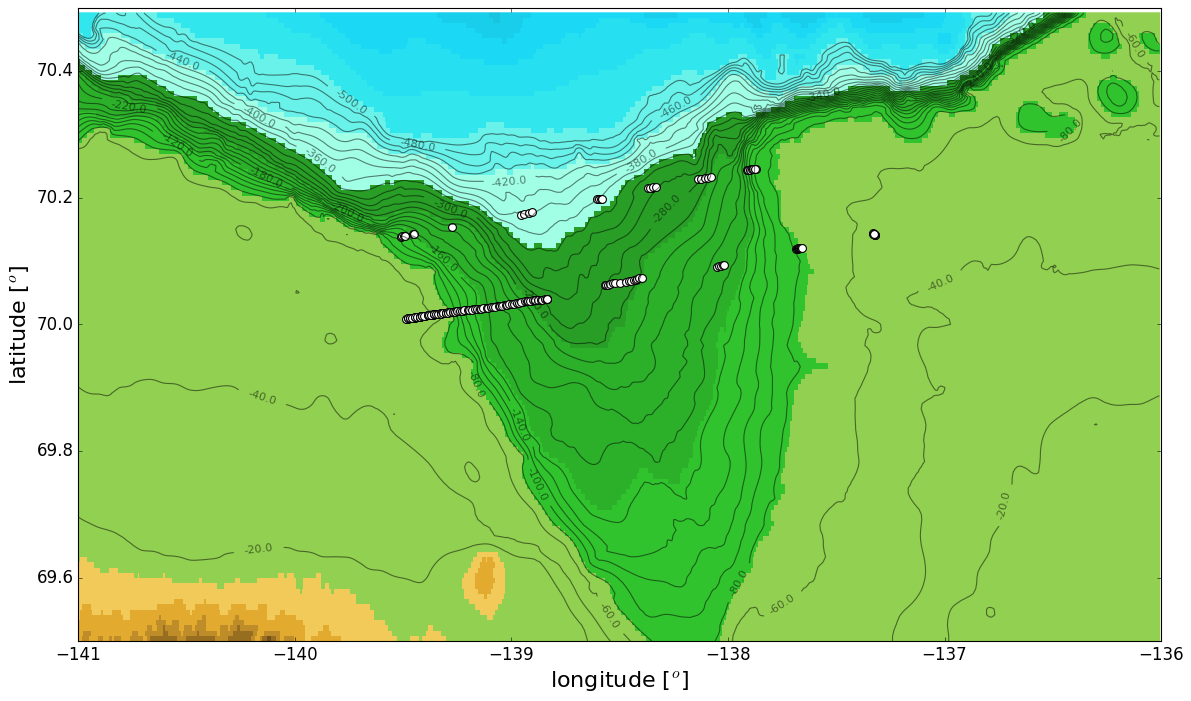

In [407]:
x, y, z = functions_plot.def_regionG(xl=-141, xr=-136, yb=69.5, yt=70.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
fig, ax = plot_map(fig, ax, x, y, z, cmapmc)
ax.scatter(lon_s, lat_s, c='w', s=50, edgecolors='k')
ax.scatter(lon_n, lat_n, c='w', s=50, edgecolors='k')

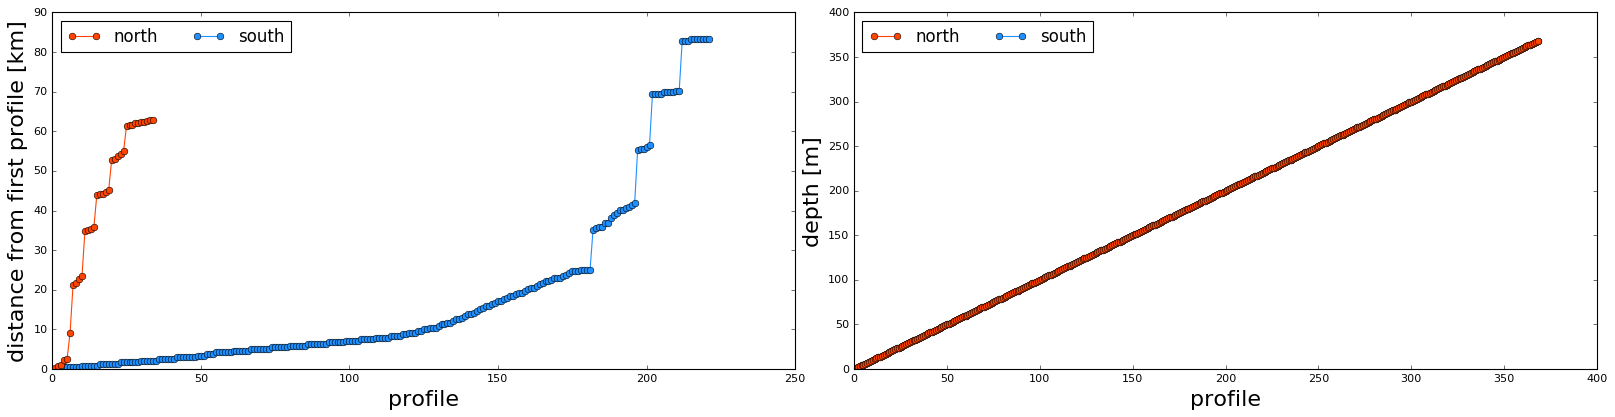

In [125]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.tight_layout(w_pad=2.5)
ttls = ['distance from first profile [km]', 'depth [m]']
for ax, plot_s, plot_n, ttl in zip(axes.flatten(), [dist_s, dep_s], [dist_n, dep_n], ttls):
    ax.plot(plot_n, marker='o', c='orangered', zorder=2, label='north')
    ax.plot(plot_s, marker='o', c='dodgerblue', zorder=1, label='south')
    ax.legend(fontsize=15, loc=2, ncol=2)
    ax.set_xlabel('profile', fontsize=20)
    ax.set_ylabel(ttl, fontsize=20)

In [445]:
def plot_crosscanyon(xval, dep, temp, salt, supttl, xlab, x, y, z, cmapmc, lon, lat):
    fig = plt.figure(figsize=(20, 14))
    ax0 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
    ax1 = plt.subplot2grid((2, 2), (1, 0))
    ax2 = plt.subplot2grid((2, 2), (1, 1))

    fig, ax0 = plot_map(fig, ax0, x, y, z, cmapmc)
    ax0.scatter(lon, lat, c='w', s=50, edgecolors='k')
    
    cmaps = [cm.Spectral_r, cm.Spectral_r]
    ttls = ['temperature', 'salinity']
    for ax, var, ttl, cmap, vmin, vmax in zip([ax1, ax2], [temp, salt], ttls, cmaps, [-1.5, 29], [4, 34]):
        cmap = plt.get_cmap(cmap)
        cmap.set_bad('silver')
        if xval==None:
            p = ax.pcolormesh(var, cmap=cmap, vmin=vmin, vmax=vmax)
            ax.set_xlim([0, var.shape[-1]])
        else:
            p = ax.pcolormesh(xval, dep, var, cmap=cmap, vmin=vmin, vmax=vmax)
            ax.set_xlim([xval.min(), xval.max()])
        ax.set_ylim([np.nanmax(dep), np.nanmin(dep)])
        ax.set_xlabel(xlab, fontsize=20)
        ax.set_ylabel('depth [m]', fontsize=20)
        fig.colorbar(p, ax=ax)
        ax.set_title(supttl + ' stations -- ' + ttl, fontsize=20)
    fig.tight_layout(w_pad=0.2)
    
    return fig

# Southern Transect

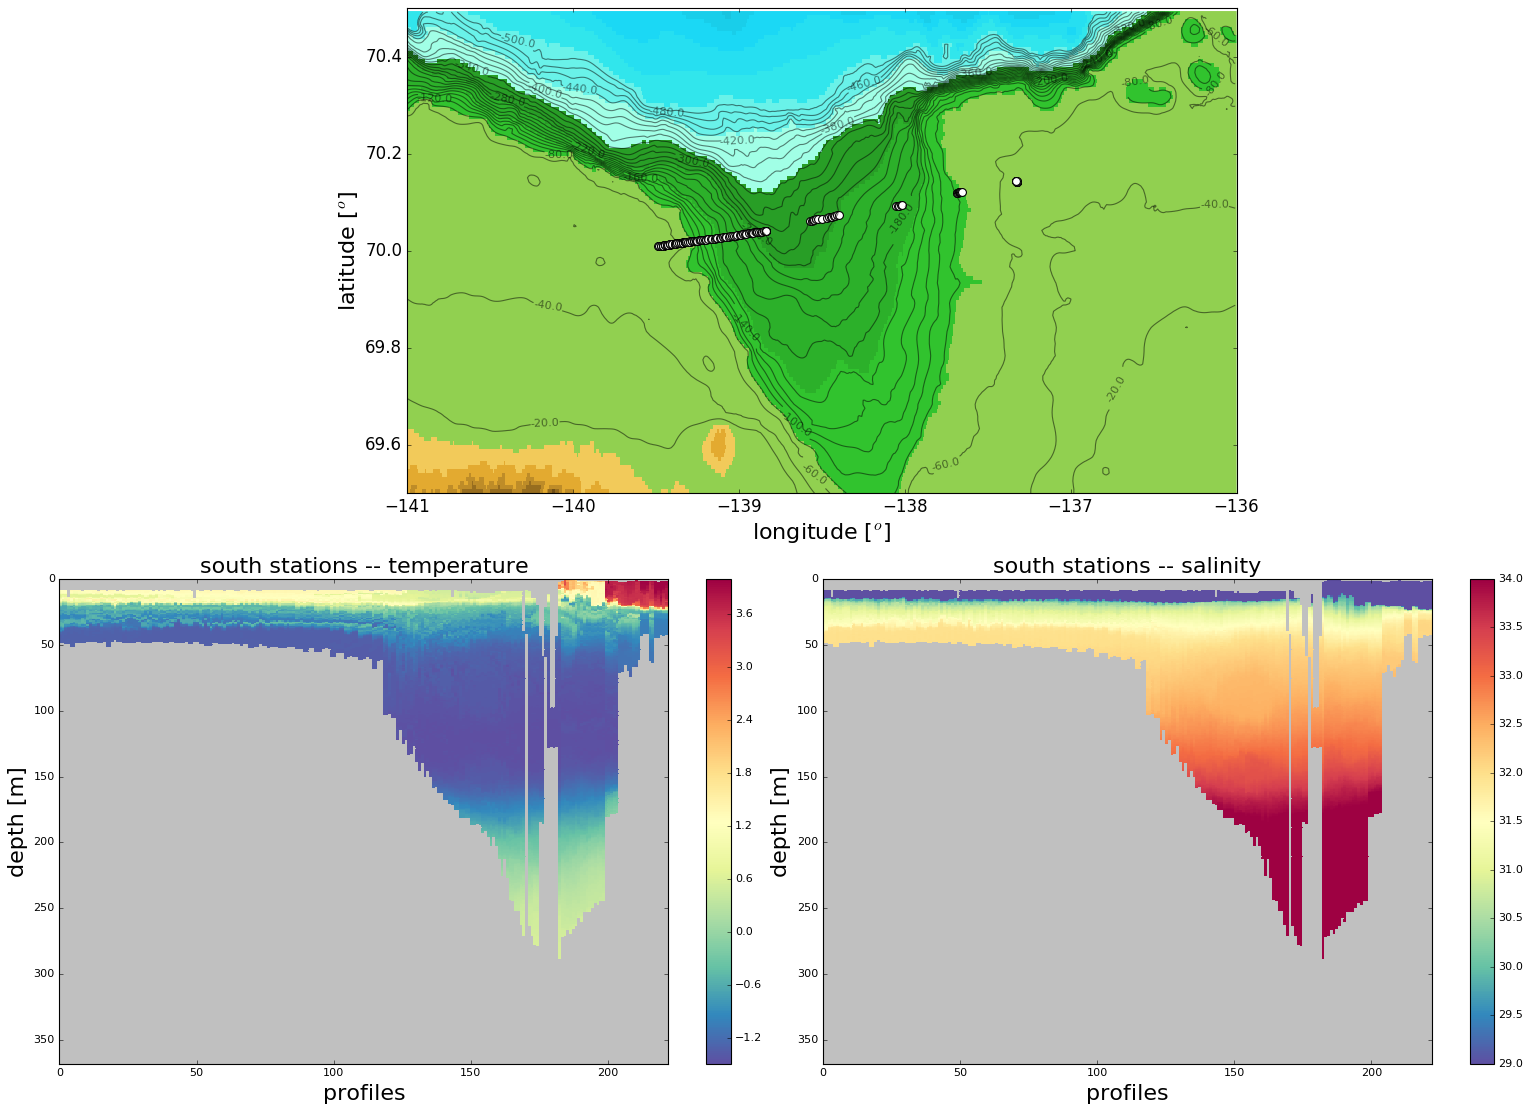

In [446]:
fig = plot_crosscanyon(None, dep_s, temp_s, salt_s, 'south', 'profiles', x, y, z, cmapmc, lon_s, lat_s)

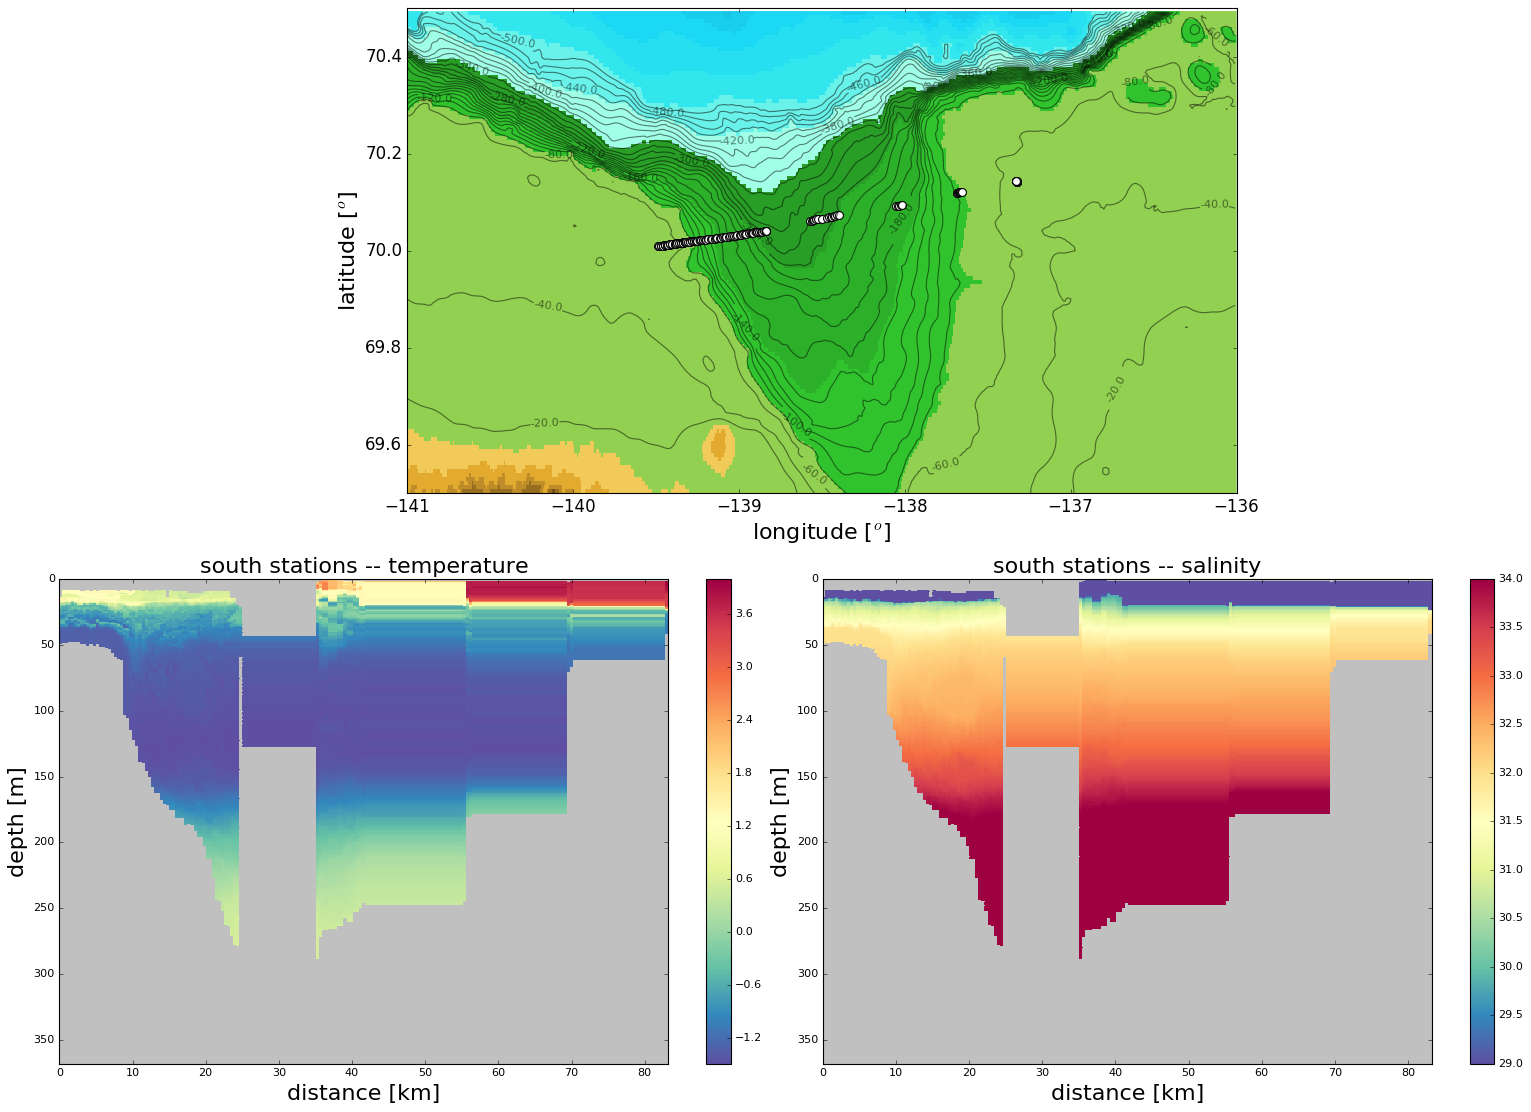

In [409]:
fig = plot_crosscanyon(dist_s, dep_s, temp_s, salt_s, 'south', 'distance [km]', x, y, z, cmapmc, lon_s, lat_s)

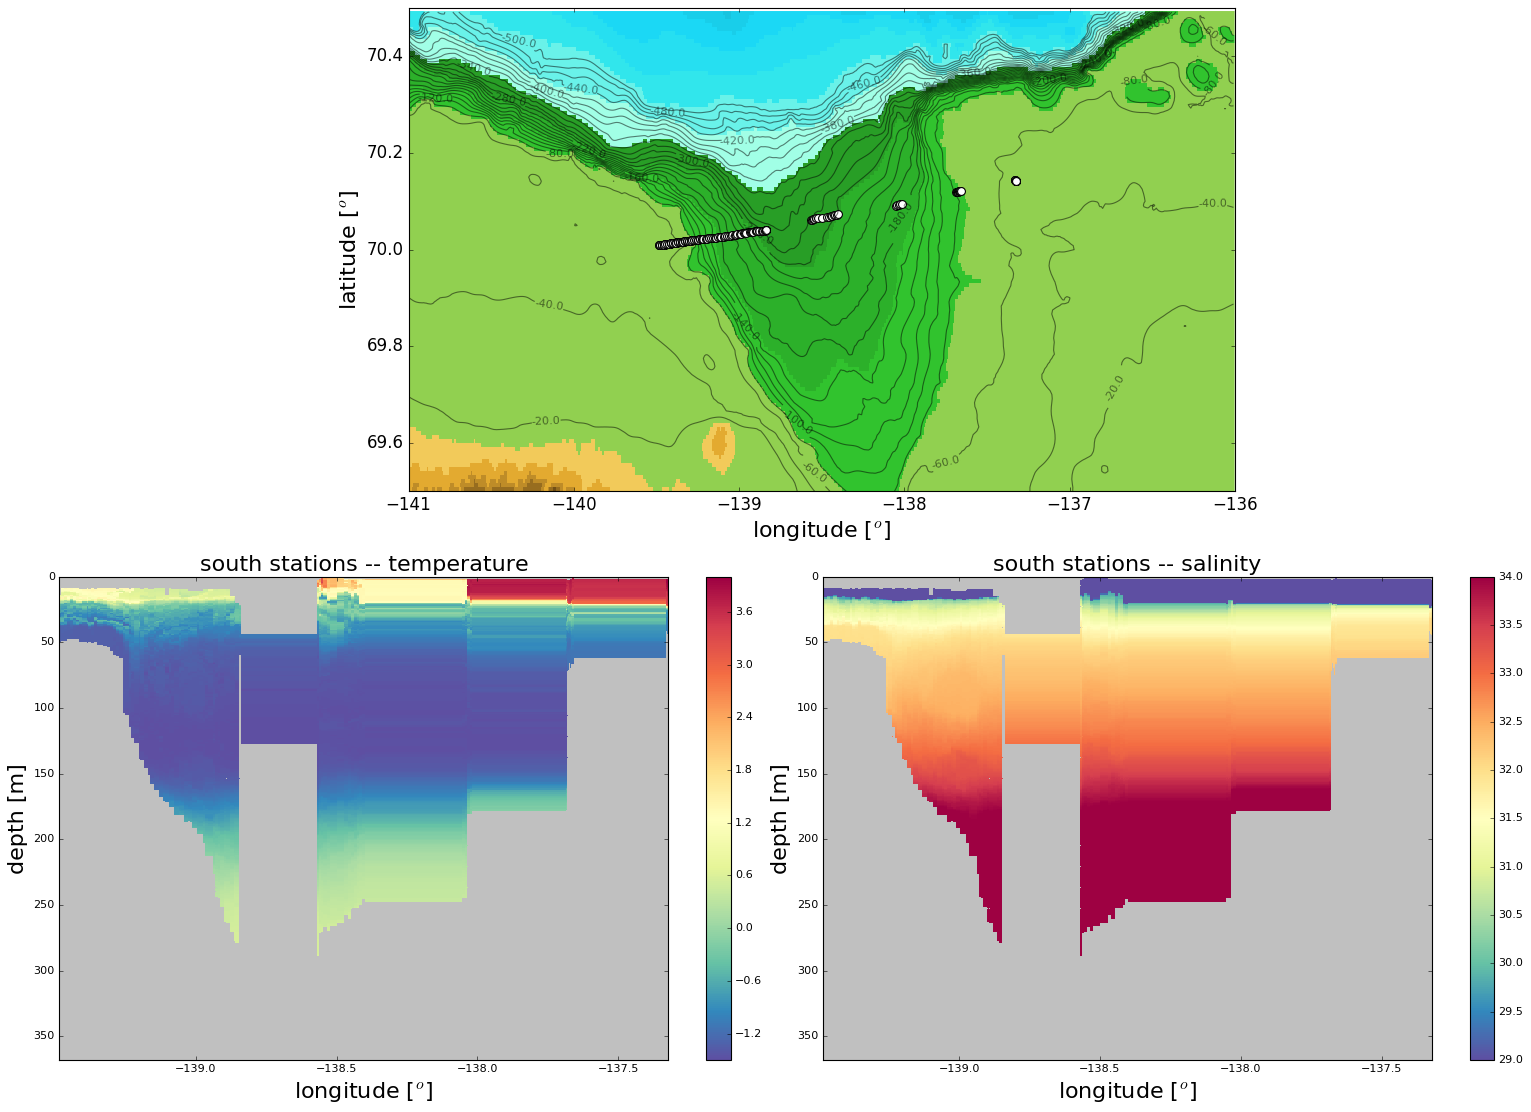

In [410]:
fig = plot_crosscanyon(lon_s, dep_s, temp_s, salt_s, 'south', 'longitude [$^o$]', x, y, z, cmapmc, lon_s, lat_s)

# Northern Transect

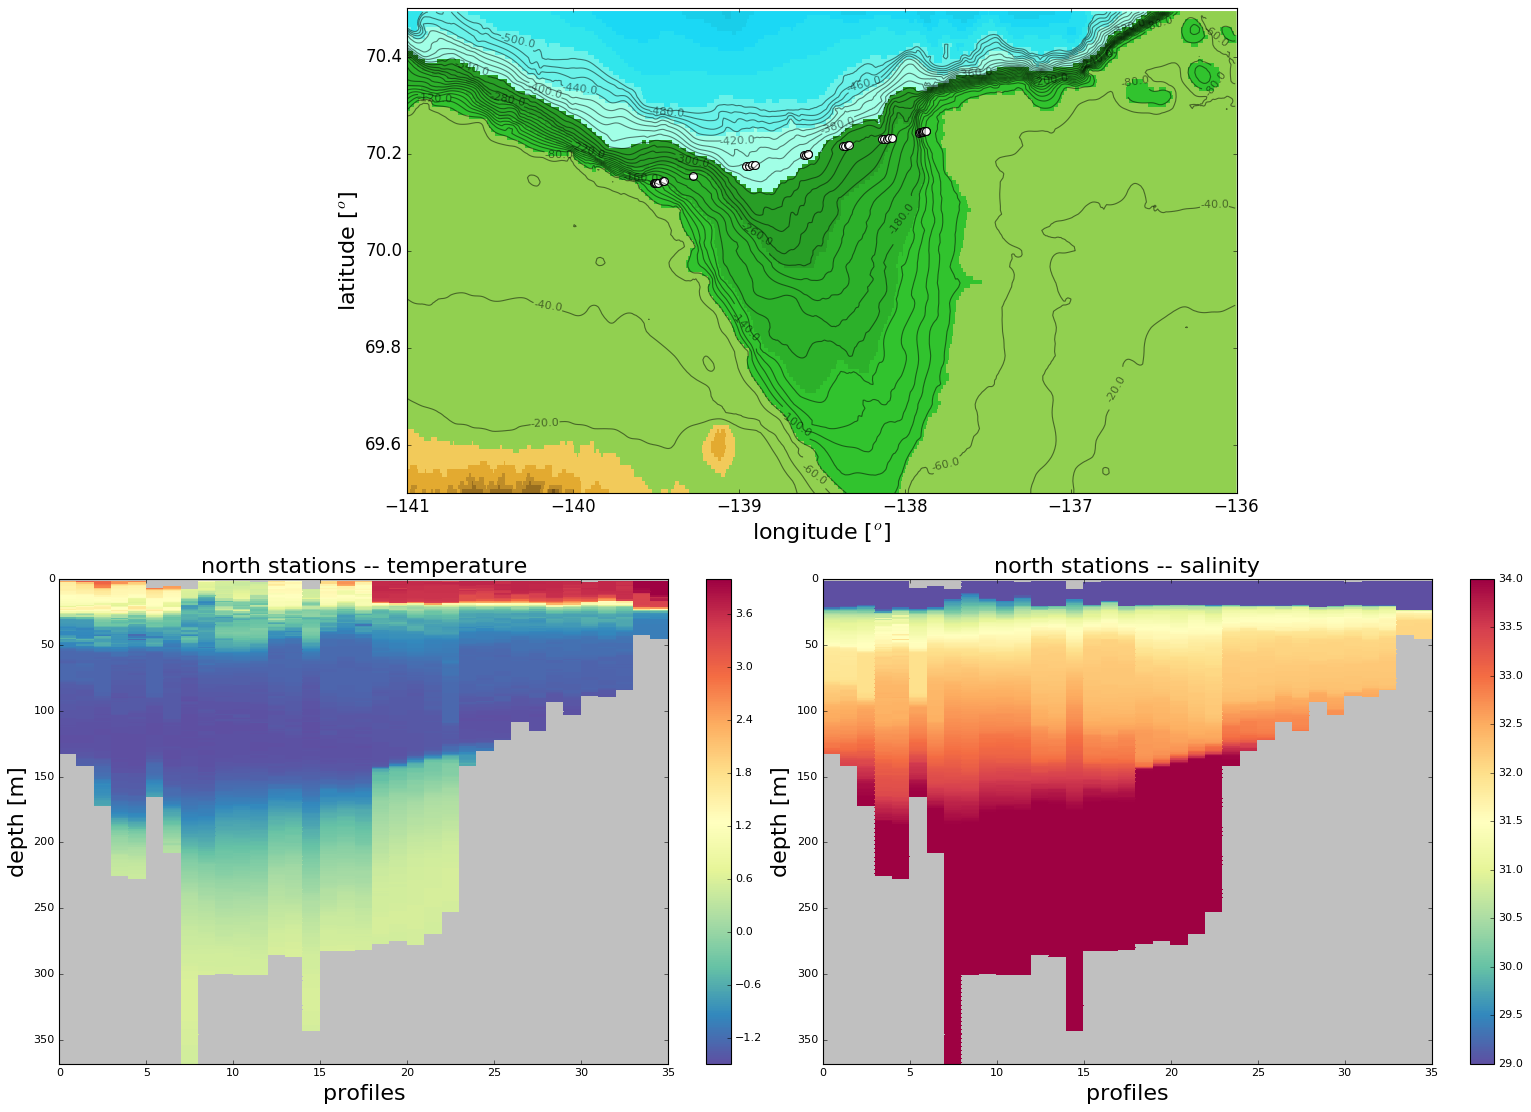

In [415]:
fig = plot_crosscanyon(None, dep_n, temp_n, salt_n, 'north', 'profiles', x, y, z, cmapmc, lon_n, lat_n)

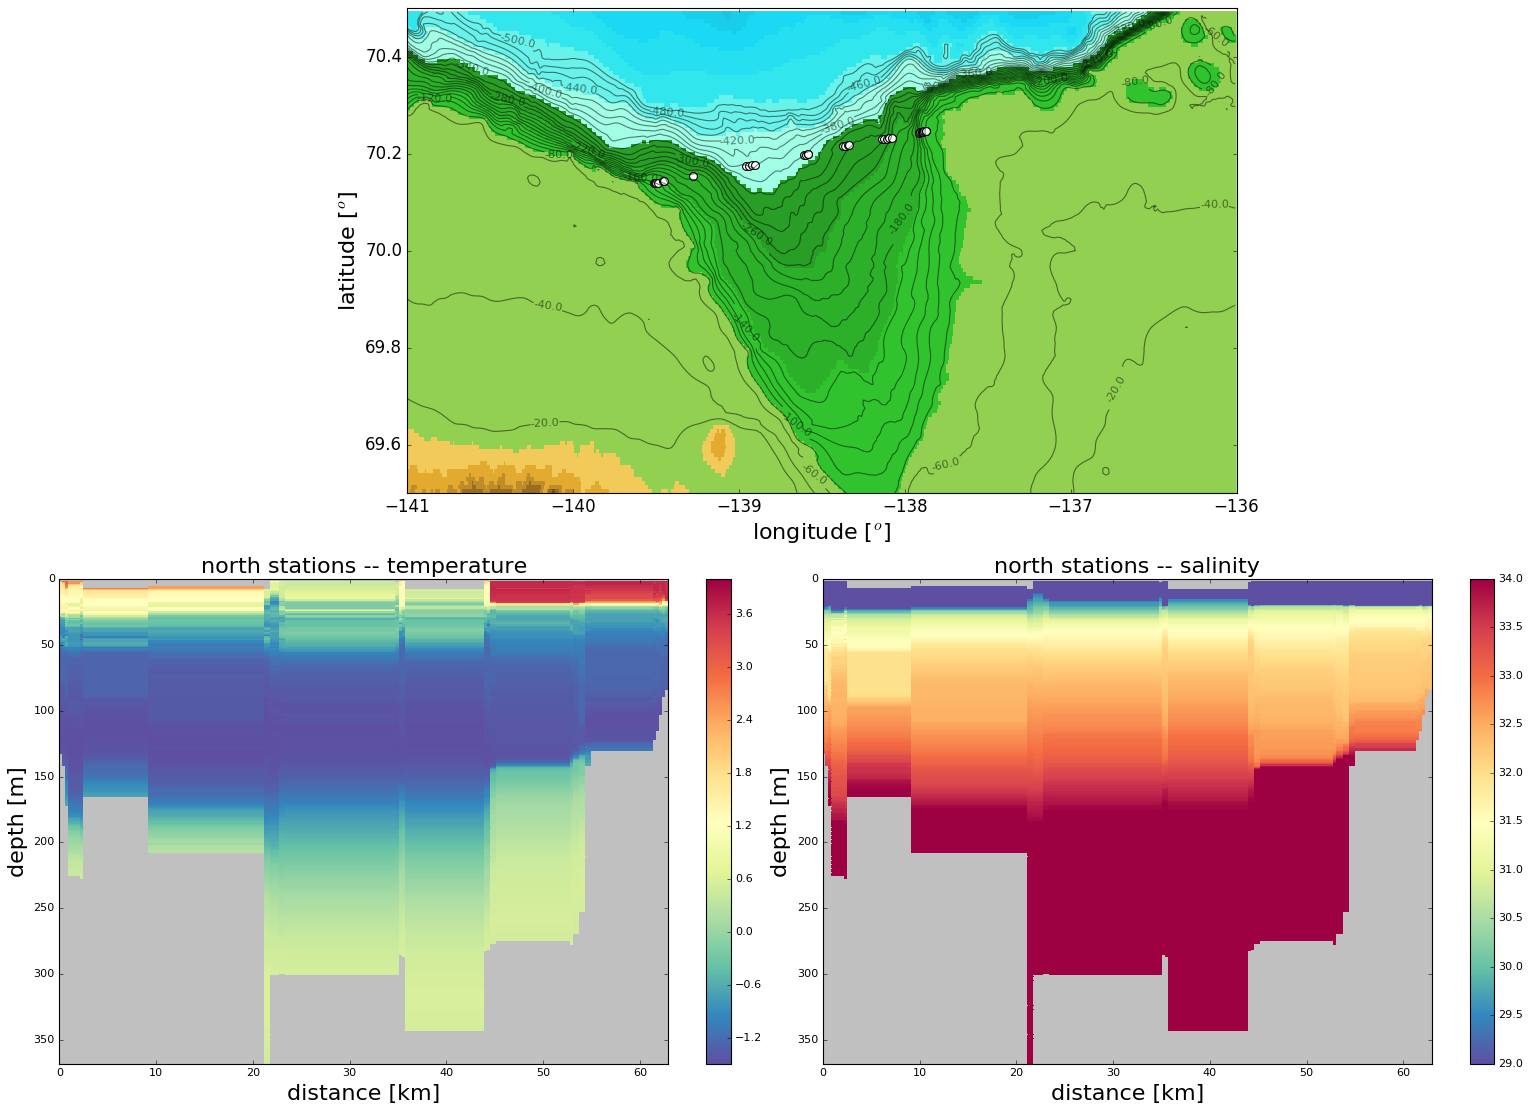

In [412]:
fig = plot_crosscanyon(dist_n, dep_n, temp_n, salt_n, 'north', 'distance [km]', x, y, z, cmapmc, lon_n, lat_n)

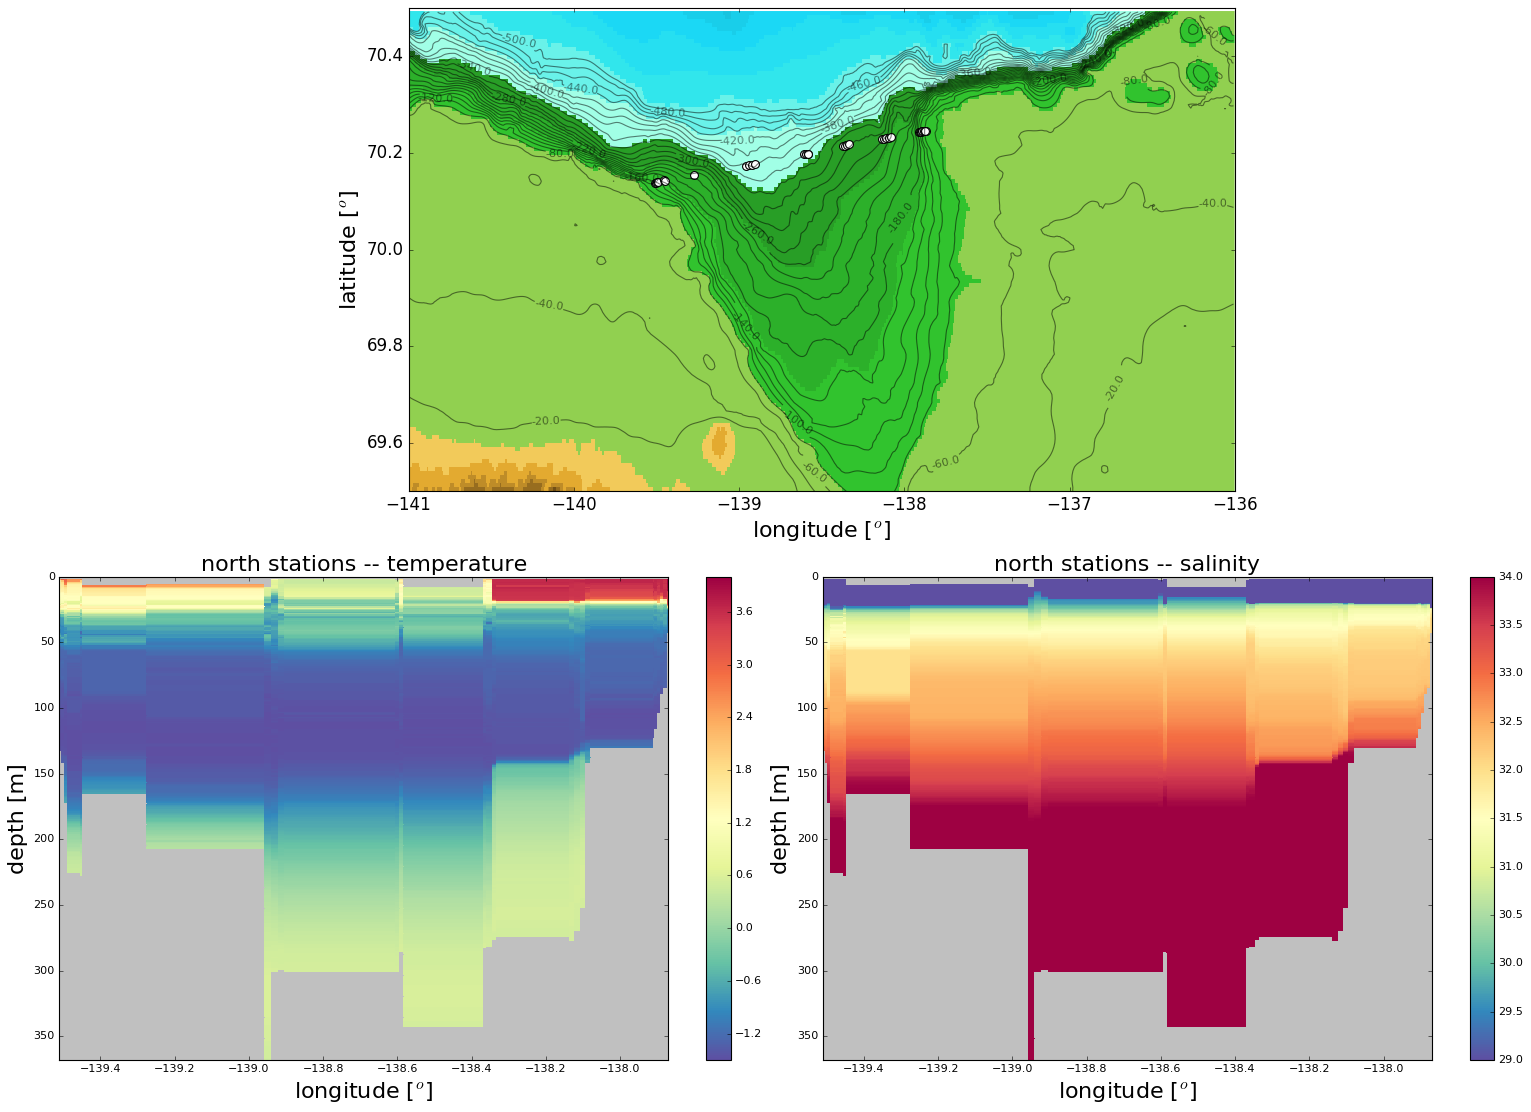

In [413]:
fig = plot_crosscanyon(lon_n, dep_n, temp_n, salt_n, 'north', 'longitude [$^o$]', x, y, z, cmapmc, lon_n, lat_n)

# Depth mean at profile locations

Model depth levels:

     deptht = 4.375, 13.125, 21.875, 30.625, 39.375, 48.125, 56.875, 65.625, 
        74.375, 83.125, 91.875, 100.625, 109.375, 118.125, 126.875, 135.625, 
        144.375, 153.125, 161.875, 170.625, 179.375, 188.125, 196.875, 205.625, 
        214.375, 223.125, 231.875, 240.625, 249.375, 258.125, 266.875, 275.625, 
        284.375, 293.125, 301.875, 310.625, 319.375, 328.125, 336.875, 345.625, 
        354.375, 363.125, 371.875, 380.625, 389.375, 398.125, 406.875, 415.625, 
        424.375, 433.125, 441.875, 450.625, 459.375, 468.125, 476.875, 485.6253, 
        494.3771, 503.1404, 511.9886, 521.4466, 534.6722, 560.3319, 598.4258, 
        640.2872, 682.7585, 725.3146, 767.8822, 810.4514, 853.0208, 895.5903, 
        938.1597, 980.7292, 1023.299, 1065.868, 1108.438, 1151.007, 1193.576, 
        1236.146, 1278.715, 1321.285

In [678]:
def scatter_map(x, y, z, lon_s, lat_s, dep_s, var_s, lon_n, lat_n, dep_n, var_n, dep1, dep2, ttl):
    fig = plt.figure(figsize=(20, 14))
    ax0 = plt.subplot2grid((3, 2), (0, 0))
    ax1 = plt.subplot2grid((3, 2), (0, 1))
    ax2 = plt.subplot2grid((3, 2), (1, 0), colspan=2, rowspan=2)

    plot_s = np.mean(var_s[dep1:dep2], axis=0)
    plot_n = np.mean(var_n[dep1:dep2], axis=0)
    
    vmin = min(np.min(plot_s), np.min(plot_n))
    vmax = max(np.max(plot_s), np.max(plot_n))
    
    fig, ax2 = plot_map(fig, ax2, x, y, z, None)
    cmap = cm.rainbow
    ax2.scatter(lon_s, lat_s, c=plot_s, s=300, edgecolors='k', cmap=cmap, vmin=vmin, vmax=vmax)
    p = ax2.scatter(lon_n, lat_n, c=plot_n, s=300, edgecolors='k', cmap=cmap, vmin=vmin, vmax=vmax)
    
    fig.colorbar(p, ax=ax2, fraction=0.02, pad=0.05)
    ax2.set_xlim([-140, -137.5])
    ax2.set_ylim([69.9, 70.3])
    ax2.set_title(ttl + ' (average for depths ' + str(dep1) + '-' + str(dep2) + ')', fontsize=20)

    if ttl == 'temperature':
        vminc, vmaxc = -1.5, 4
        cmapc = cm.Spectral_r
    elif ttl == 'salinity':
        vminc, vmaxc = 29, 34
        cmapc = cm.Spectral_r
    ttls = ['north', 'south']
    for ax, lon, dep, var, ttlc in zip([ax0, ax1], [lon_n, lon_s], [dep_n, dep_s], [var_n, var_s], ttls):
        cmapc = plt.get_cmap(cmapc)
        cmapc.set_bad('silver')
        p = ax.pcolormesh(lon, dep, var, cmap=cmapc, vmin=vminc, vmax=vmaxc)
        ax.set_xlim([lon.min(), lon.max()])
        ax.set_ylim([np.nanmax(dep), np.nanmin(dep)])
        ax.set_xlabel('longitude', fontsize=20)
        ax.set_ylabel('depth', fontsize=20)
        ax.set_title(ttlc + ' stations -- ' + ttl, fontsize=20)
        fig.colorbar(p, ax=ax)
        ax.axhline(dep1, c='k', lw=3)
        ax.axhline(dep2, c='k', lw=3)
    
    fig.tight_layout(w_pad=0.2)
    return fig

### 1. Surface

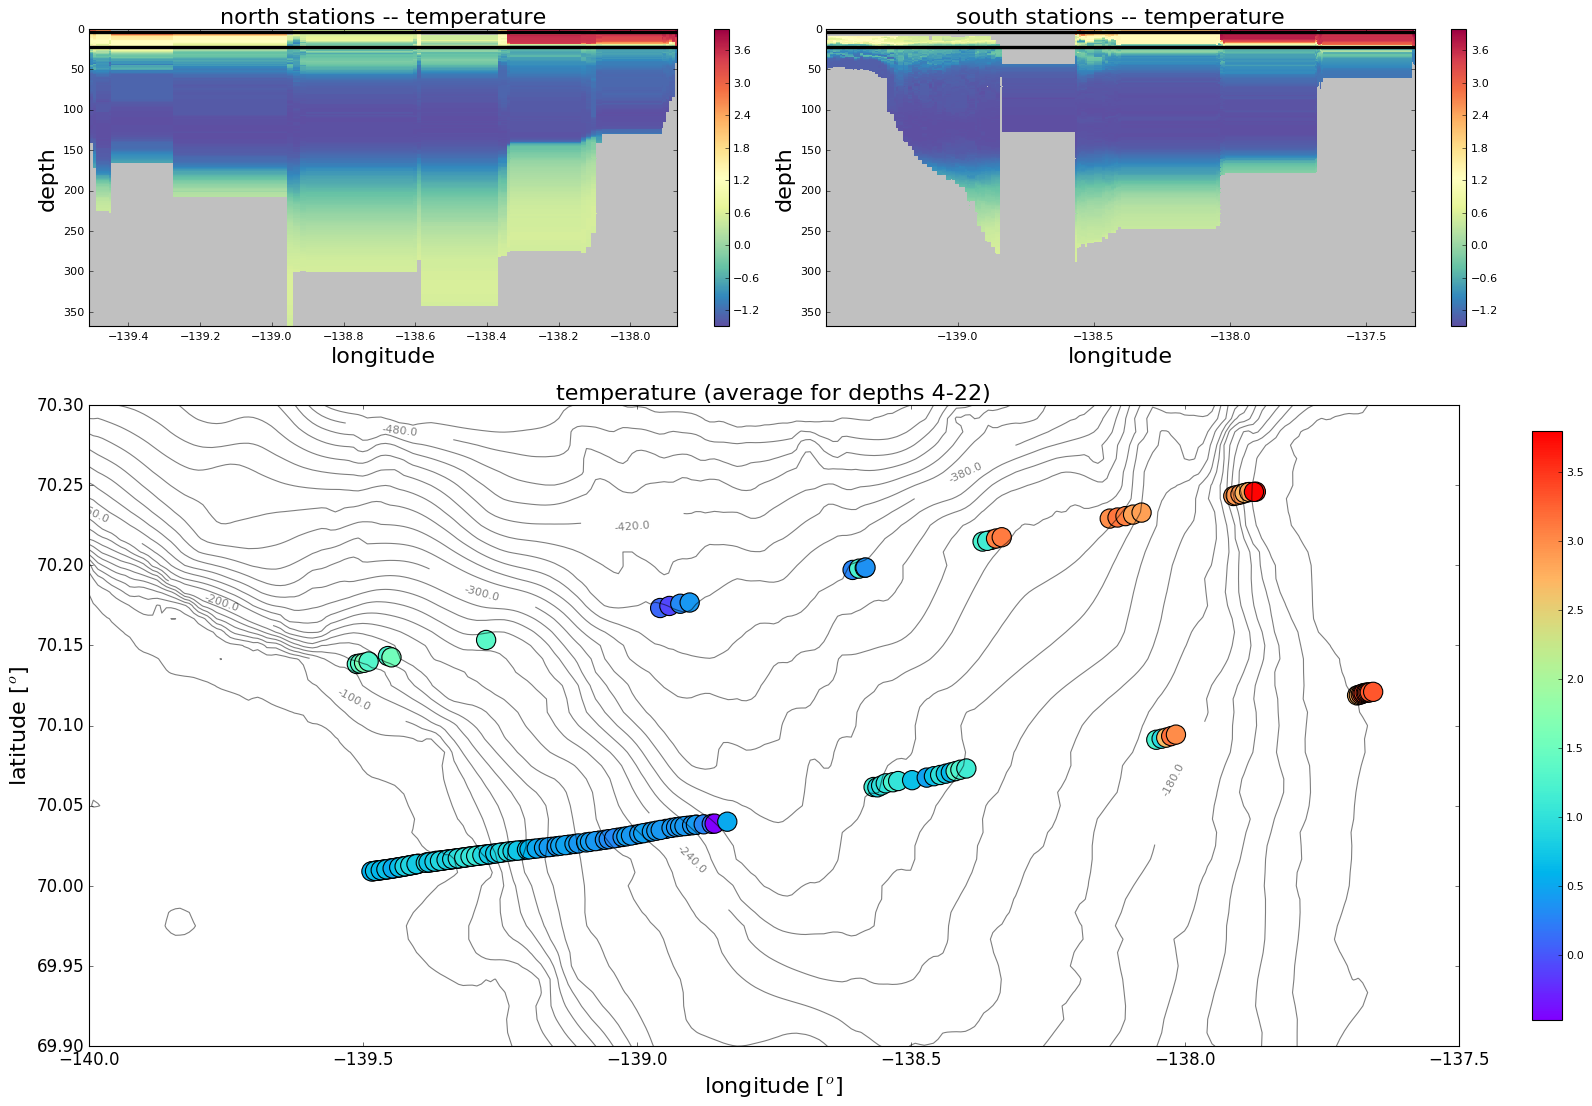

In [679]:
fig = scatter_map(x, y, z, lon_s, lat_s, dep_s, temp_s, lon_n, lat_n, dep_n, temp_n, 4, 22, 'temperature')

### 2. Shelf break depth

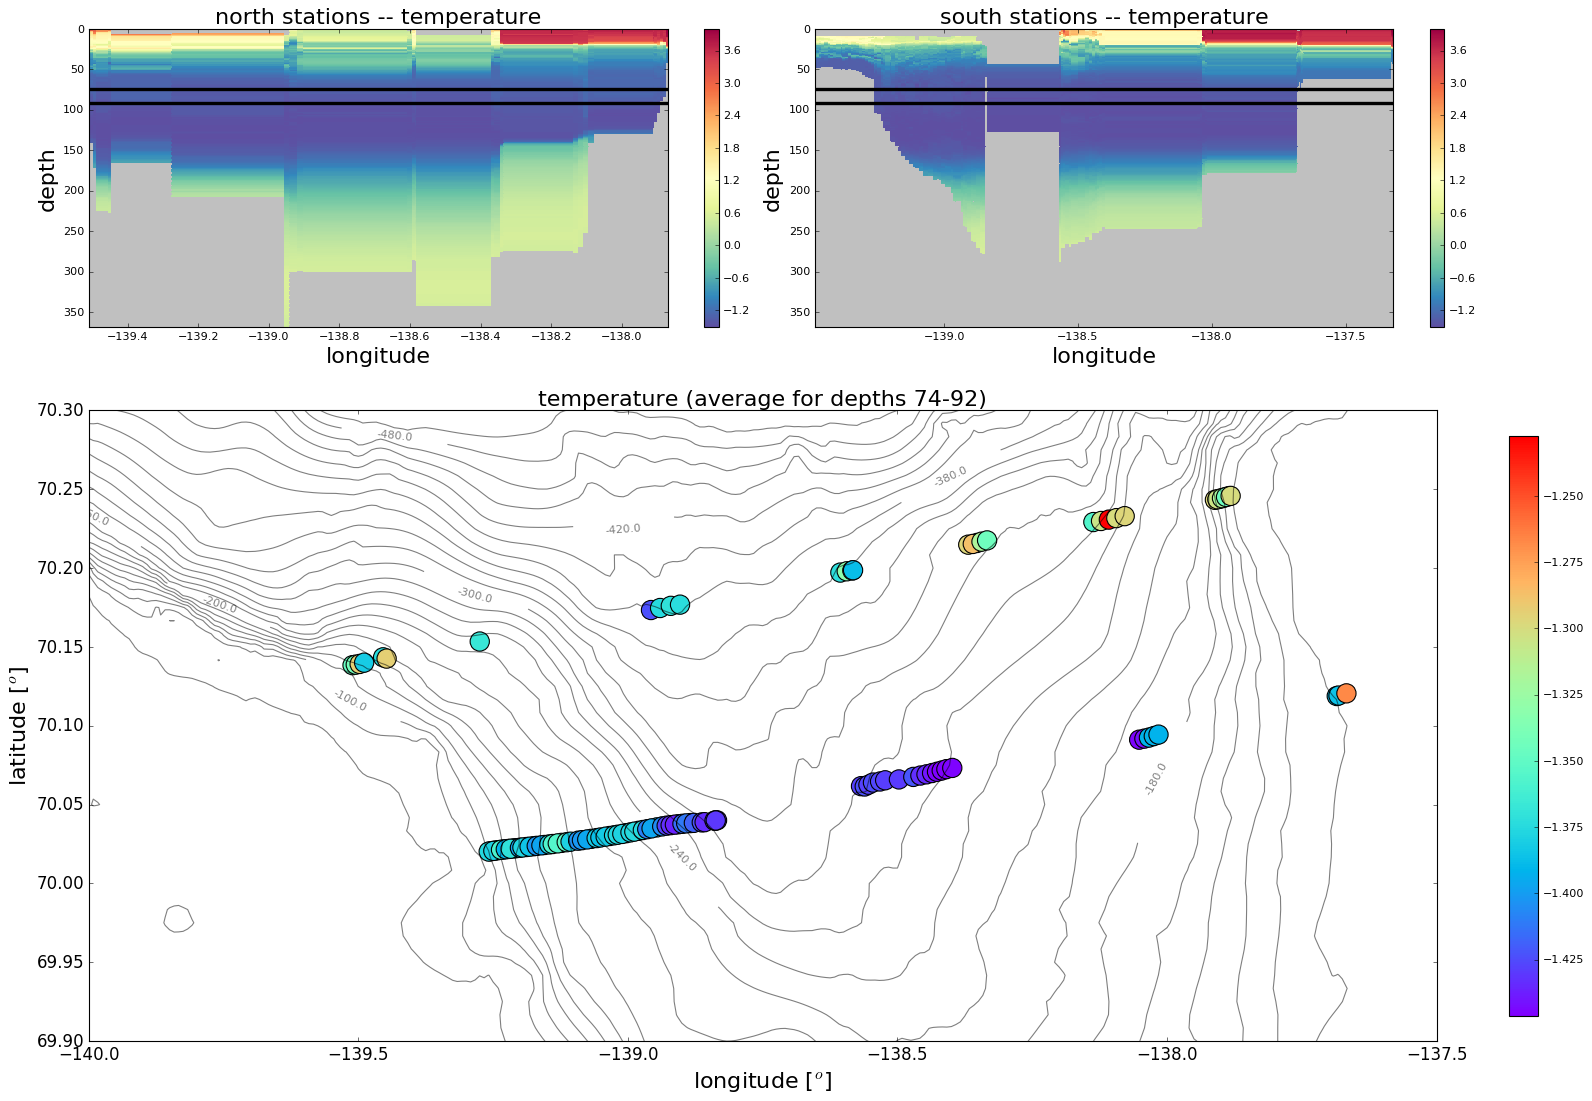

In [681]:
fig = scatter_map(x, y, z, lon_s, lat_s, dep_s, temp_s, lon_n, lat_n, dep_n, temp_n, 74, 92, 'temperature')

### 3. Upwelling on east side of northern section

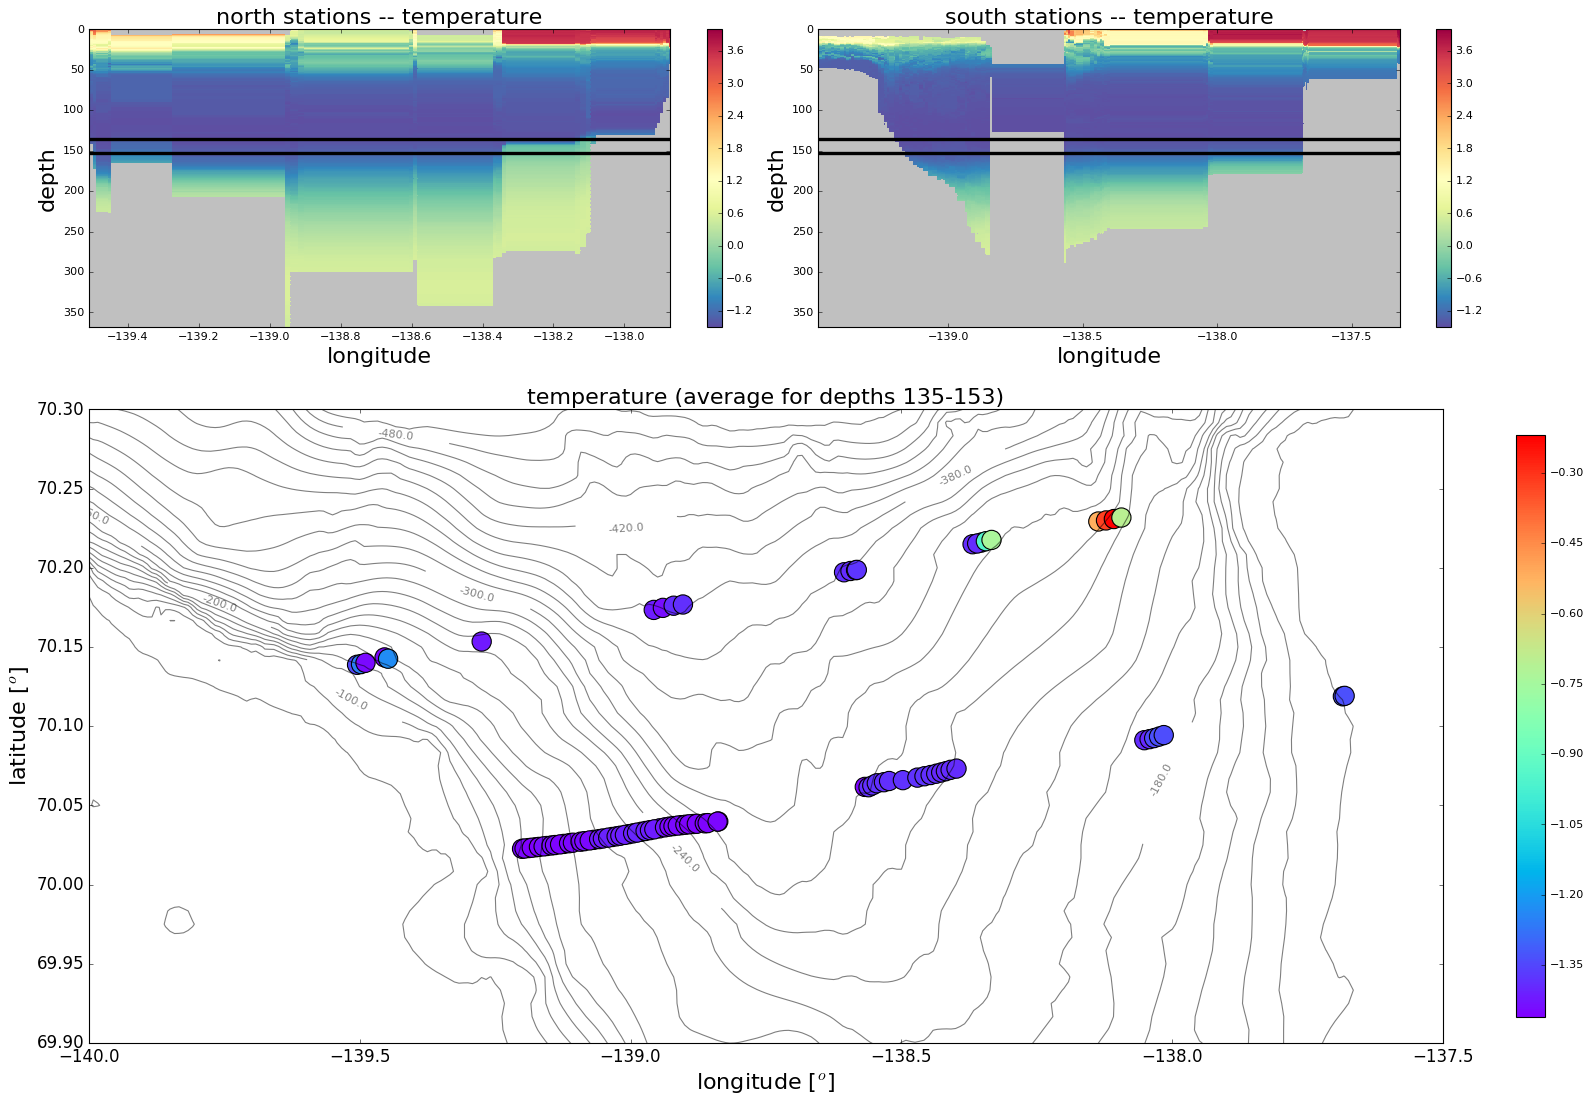

In [684]:
fig = scatter_map(x, y, z, lon_s, lat_s, dep_s, temp_s, lon_n, lat_n, dep_n, temp_n, 135, 153, 'temperature')

### 4. Upwelling on east side of southern section

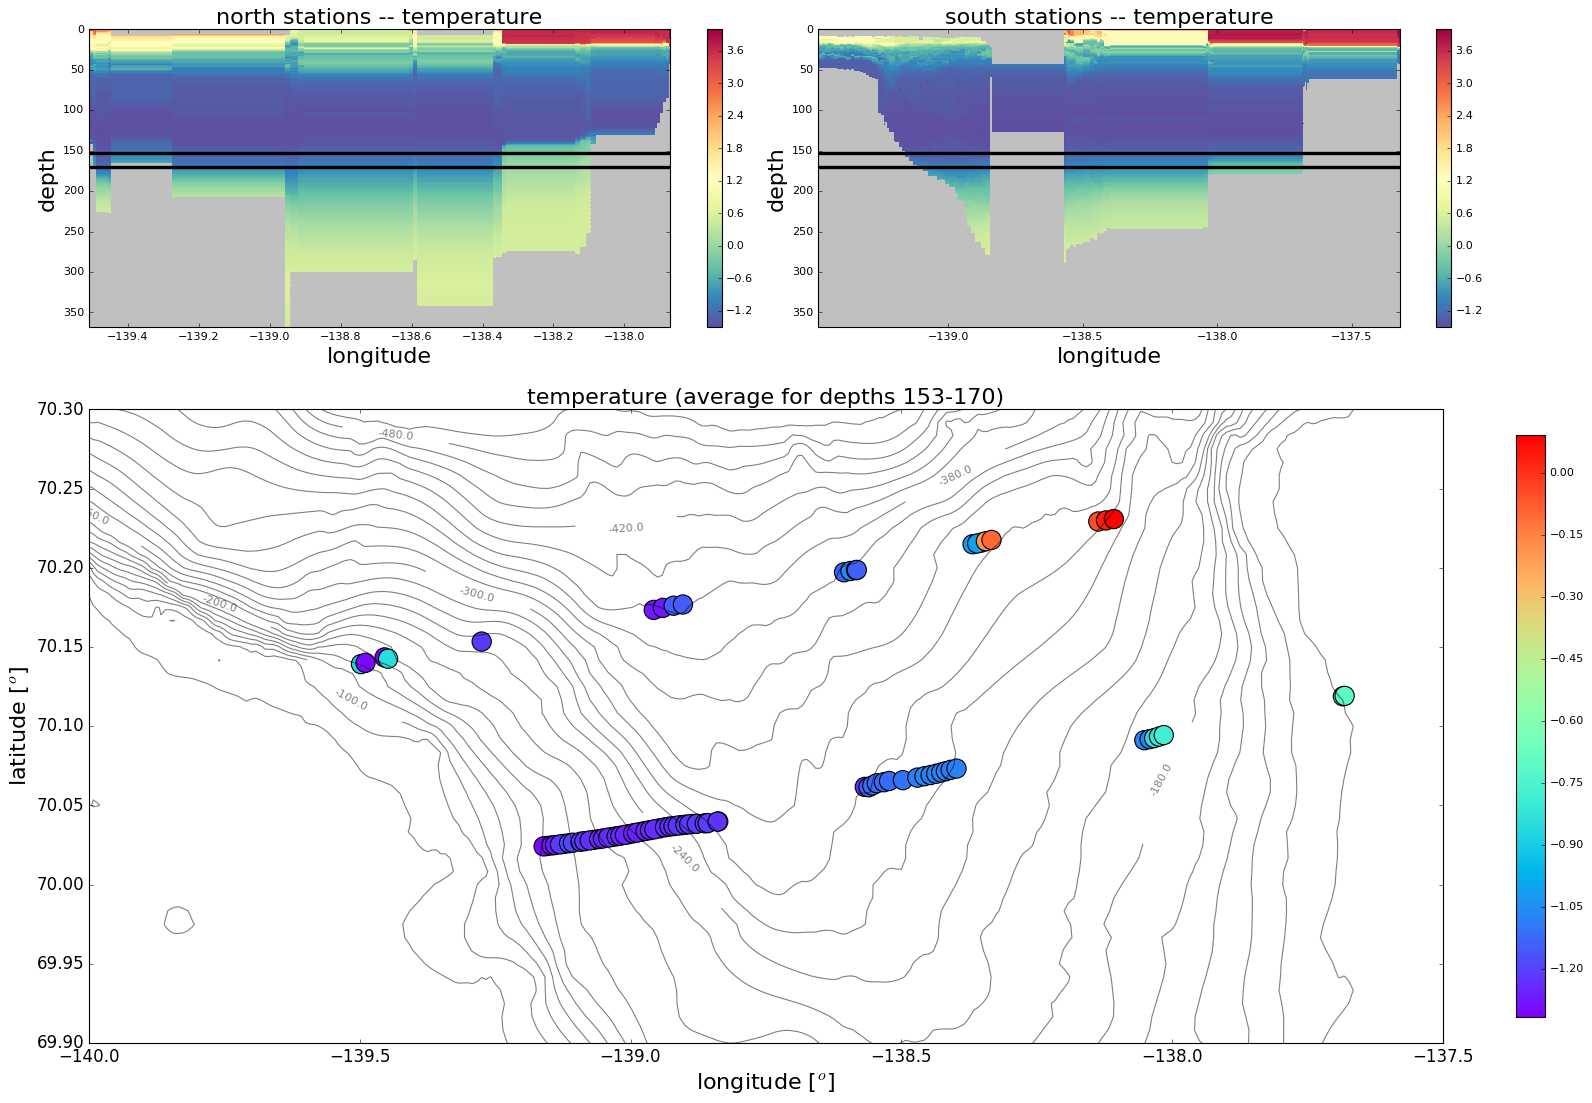

In [685]:
fig = scatter_map(x, y, z, lon_s, lat_s, dep_s, temp_s, lon_n, lat_n, dep_n, temp_n, 153, 170, 'temperature')

### 5. Deeper in canyon

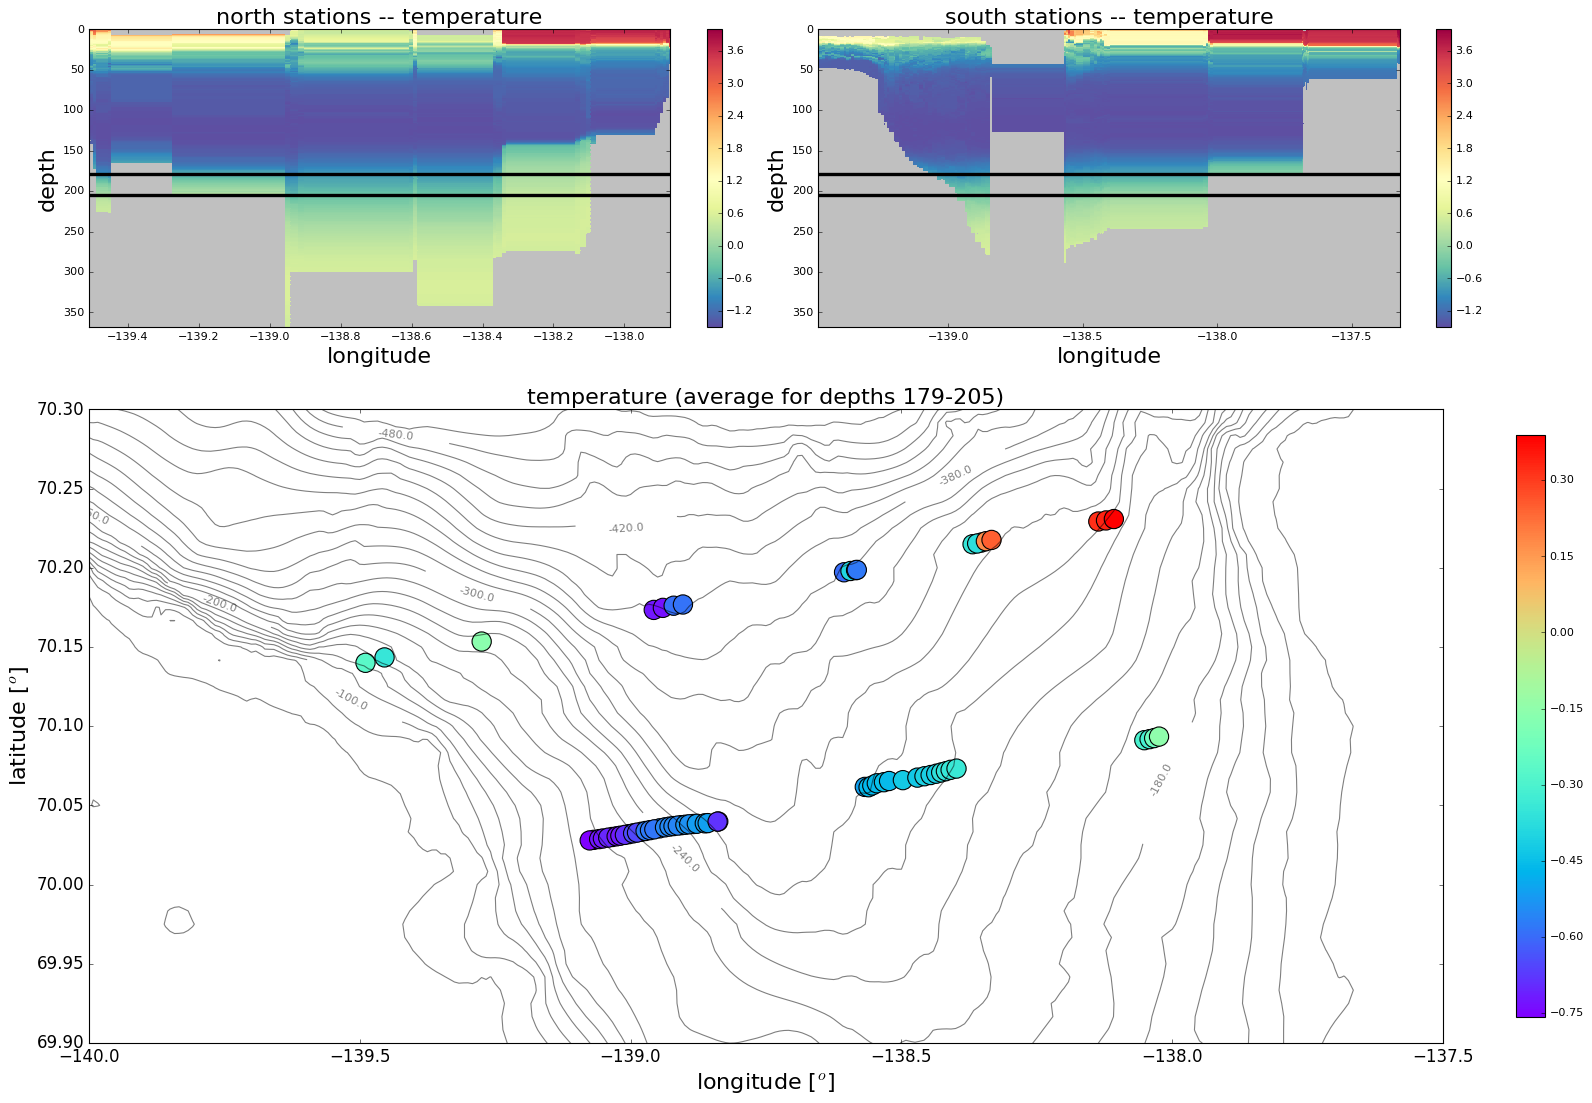

In [687]:
fig = scatter_map(x, y, z, lon_s, lat_s, dep_s, temp_s, lon_n, lat_n, dep_n, temp_n, 179, 205, 'temperature')

### 6. Bottom

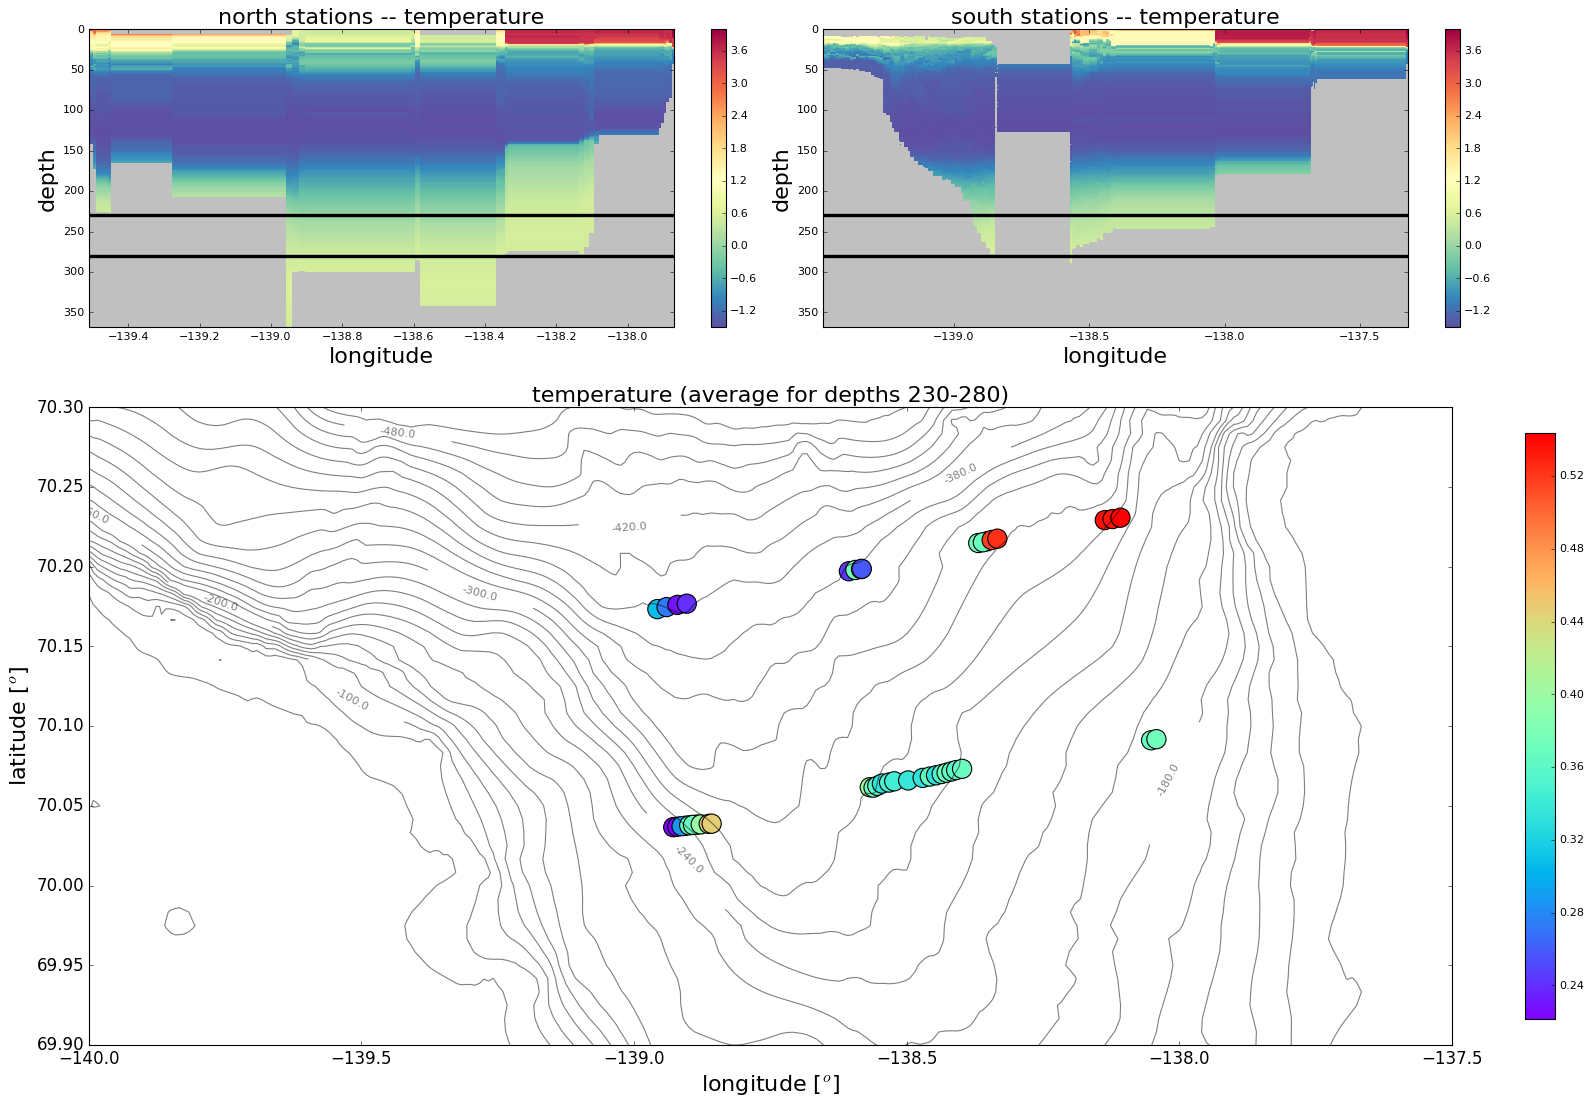

In [690]:
fig = scatter_map(x, y, z, lon_s, lat_s, dep_s, temp_s, lon_n, lat_n, dep_n, temp_n, 230, 280, 'temperature')